In [1]:
'''
DESCRIPTION:

* A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and 
real estate analysis. 
* The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income
and rental of the real estate.
* A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region 
in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
* The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental 
income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics 
described here do not limit the dashboard to these few.

'''

'\nDESCRIPTION:\n\n* A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and \nreal estate analysis. \n* The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income\nand rental of the real estate.\n* A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region \nin the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.\n* The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental \nincome, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics \ndescribed here do not limit the dashboard to these few.\n\n'

In [2]:
'''
Data Import and Preparation:

Import data.
Figure out the primary key and look for the requirement of indexing.
Gauge the fill rate of the variables and devise plans for missing value treatment. 
Please explain explicitly the reason for the treatment chosen for each variable.
'''

'\nData Import and Preparation:\n\nImport data.\nFigure out the primary key and look for the requirement of indexing.\nGauge the fill rate of the variables and devise plans for missing value treatment. \nPlease explain explicitly the reason for the treatment chosen for each variable.\n'

In [3]:
# Importing required libraries and dataset
import pandas as pd
train_url = "https://raw.githubusercontent.com/PraveenBandla/Data-Science-Projects/master/Data-Science-Capstone-Projects/Project%201/train.csv"
real_train_df = pd.read_csv(train_url)
real_train_df

UID  BLOCKID  SUMLEVEL  ...  married_snp  separated divorced
0      267822      NaN       140  ...      0.01882    0.01240  0.08770
1      246444      NaN       140  ...      0.01426    0.01426  0.09030
2      245683      NaN       140  ...      0.02830    0.01607  0.10657
3      279653      NaN       140  ...      0.02021    0.02021  0.10106
4      247218      NaN       140  ...      0.00000    0.00000  0.03109
...       ...      ...       ...  ...          ...        ...      ...
27316  279212      NaN       140  ...      0.03042    0.02249  0.14683
27317  277856      NaN       140  ...      0.05003    0.02473  0.04888
27318  233000      NaN       140  ...      0.01386    0.00520  0.07712
27319  287425      NaN       140  ...      0.02287    0.00915  0.05261
27320  265371      NaN       140  ...      0.03825    0.03005  0.13320

[27321 rows x 80 columns]

In [4]:
# Data Preparation
# Figure out the primary key and look for the requirement of indexing.
real_train_df.info()
# Observations:
# We can consider UID (location ID) as the primary key as it is unique across different locations
# UID can be moved to dataframe index since it is used for identifying a record and not for prediction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [5]:
#Checking for duplicates
real_train_df[real_train_df.duplicated()]
# Observations:
# 160 duplicate records are present in our dataset

UID  BLOCKID  SUMLEVEL  ...  married_snp  separated divorced
1623   230058      NaN       140  ...      0.07245    0.00250  0.01032
1907   292484      NaN       140  ...      0.00000    0.00000  0.01160
2447   268401      NaN       140  ...          NaN        NaN      NaN
4161   284060      NaN       140  ...      0.01423    0.00000  0.07245
5066   274254      NaN       140  ...      0.10169    0.00000  0.17797
...       ...      ...       ...  ...          ...        ...      ...
26769  252187      NaN       140  ...      0.06761    0.01200  0.00872
26872  293566      NaN       140  ...      0.00561    0.00000  0.02021
26910  222470      NaN       140  ...      0.01717    0.00082  0.21668
27175  235725      NaN       140  ...      0.10753    0.10753  0.09946
27176  247777      NaN       140  ...      0.00000    0.00000  0.00000

[160 rows x 80 columns]

In [6]:
#Removing duplicates
real_train_df = real_train_df.drop_duplicates()
real_train_df.shape

(27161, 80)

In [7]:
# Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.
# Checking for NULL Values
real_train_df.isna().sum()
# Observations:
# Block ID is NULL for all the records => It can be removed from the dataset
# There are NULL Values across rent, income, mortgage, equity, age and marital status columns
# Since the NULL values are only ~2%, We can drop the records with NULL Values 

UID                0
BLOCKID        27161
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          207
married          150
married_snp      150
separated        150
divorced         150
Length: 80, dtype: int64

In [8]:
# Moving UID to Index
real_train_df.index = real_train_df['UID']
real_train_df.head()

UID  BLOCKID  SUMLEVEL  ...  married_snp  separated divorced
UID                                ...                                 
267822  267822      NaN       140  ...      0.01882    0.01240  0.08770
246444  246444      NaN       140  ...      0.01426    0.01426  0.09030
245683  245683      NaN       140  ...      0.02830    0.01607  0.10657
279653  279653      NaN       140  ...      0.02021    0.02021  0.10106
247218  247218      NaN       140  ...      0.00000    0.00000  0.03109

[5 rows x 80 columns]

In [9]:
# Dropping UID, BlockID columns
real_train_df.drop(['UID','BLOCKID','SUMLEVEL'],axis=1,inplace=True)
real_train_df.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(27161, 77)

In [10]:
# Checking columns with a constant value
real_train_df.columns[real_train_df.nunique()<=1]

Index(['primary'], dtype='object')

In [11]:
# Dropping columns with constant value
real_train_df.drop(real_train_df.columns[real_train_df.nunique()<=1],axis=1,inplace=True)
real_train_df.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(27161, 76)

In [12]:
# Dropping records with NULL Values
real_train_df.dropna(inplace=True)
real_train_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(26585, 76)

In [13]:
# Importing the test dataset
import pandas as pd
test_url = "https://raw.githubusercontent.com/PraveenBandla/Data-Science-Projects/master/Data-Science-Capstone-Projects/Project%201/test.csv"
real_test_df = pd.read_csv(test_url)
real_test_df

UID  BLOCKID  SUMLEVEL  ...  married_snp  separated divorced
0      255504      NaN       140  ...      0.05910    0.03813  0.14299
1      252676      NaN       140  ...      0.02338    0.00000  0.13377
2      276314      NaN       140  ...      0.01746    0.01358  0.10026
3      248614      NaN       140  ...      0.05492    0.04694  0.12489
4      286865      NaN       140  ...      0.01726    0.00588  0.16379
...       ...      ...       ...  ...          ...        ...      ...
11704  238088      NaN       140  ...      0.02135    0.02135  0.08780
11705  242811      NaN       140  ...      0.07781    0.02829  0.05305
11706  250127      NaN       140  ...      0.00108    0.00108  0.07294
11707  241096      NaN       140  ...      0.02738    0.00000  0.04694
11708  287763      NaN       140  ...      0.08066    0.02520  0.10586

[11709 rows x 80 columns]

In [14]:
#Data Preparation for test dataset
real_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [15]:
# Checking for duplicates
real_test_df[real_test_df.duplicated()].shape
# Observations:
# 32 duplicate records are present in our dataset

(32, 80)

In [16]:
#Removing duplicates
real_test_df = real_test_df.drop_duplicates()
real_test_df.shape

(11677, 80)

In [17]:
#Checking for NULL values
real_test_df.isna().sum()
# Observations:
# Block ID is NULL for all the records => It can be removed from the dataset
# There are NULL Values across rent, income, mortgage, equity, age and marital status columns
# Since the NULL values are only ~2%, We can drop the records with NULL Values 

UID                0
BLOCKID        11677
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          112
married           77
married_snp       77
separated         77
divorced          77
Length: 80, dtype: int64

In [18]:
# Moving UID to Index
real_test_df.set_index('UID')
real_test_df.head()

UID  BLOCKID  SUMLEVEL  ...  married_snp  separated divorced
0  255504      NaN       140  ...      0.05910    0.03813  0.14299
1  252676      NaN       140  ...      0.02338    0.00000  0.13377
2  276314      NaN       140  ...      0.01746    0.01358  0.10026
3  248614      NaN       140  ...      0.05492    0.04694  0.12489
4  286865      NaN       140  ...      0.01726    0.00588  0.16379

[5 rows x 80 columns]

In [19]:
# Dropping UID and BlockID columns
real_test_df.drop(['UID','BLOCKID'],axis=1,inplace=True)
real_test_df.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(11677, 78)

In [20]:
# Checking for columns with constant value
real_test_df.columns[real_test_df.nunique()<=1]

Index(['SUMLEVEL', 'primary'], dtype='object')

In [21]:
# Dropping columns with constant value
real_test_df.drop(real_test_df.columns[real_test_df.nunique()<=1],axis=1,inplace=True)
real_test_df.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(11677, 76)

In [22]:
# Dropping records with NULL Values
real_test_df.dropna(inplace=True)
real_test_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(11355, 76)

In [23]:
'''
Exploratory Data Analysis (EDA):

4.Perform debt analysis. You may take the following steps:

a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. 
   You may keep the upper limit for the percent of households with a second mortgage to 50 percent

b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

c) Create pie charts to show overall debt and bad debt

d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

e) Create a collated income distribution chart for family income, house hold income, and remaining income
'''

'\nExploratory Data Analysis (EDA):\n\n4.Perform debt analysis. You may take the following steps:\n\na) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. \n   You may keep the upper limit for the percent of households with a second mortgage to 50 percent\n\nb) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage \n\nc) Create pie charts to show overall debt and bad debt\n\nd) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities\n\ne) Create a collated income distribution chart for family income, house hold income, and remaining income\n'

In [24]:
# Combining train and test datasets for EDA
real_df = real_train_df.append(real_test_df)
real_df

COUNTYID  STATEID          state  ... married_snp separated divorced
267822        53       36       New York  ...     0.01882   0.01240  0.08770
246444       141       18        Indiana  ...     0.01426   0.01426  0.09030
245683        63       18        Indiana  ...     0.02830   0.01607  0.10657
279653       127       72    Puerto Rico  ...     0.02021   0.02021  0.10106
247218       161       20         Kansas  ...     0.00000   0.00000  0.03109
...          ...      ...            ...  ...         ...       ...      ...
11704        105       12        Florida  ...     0.02135   0.02135  0.08780
11705         31       17       Illinois  ...     0.07781   0.02829  0.05305
11706          9       25  Massachusetts  ...     0.00108   0.00108  0.07294
11707         27       19           Iowa  ...     0.02738   0.00000  0.04694
11708        453       48          Texas  ...     0.08066   0.02520  0.10586

[37940 rows x 76 columns]

In [25]:
# a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. 
#    You may keep the upper limit for the percent of households with a second mortgage to 50 percent
geo_df = real_df[real_df.home_equity > 0.1].sort_values('second_mortgage',ascending=False).head(2500)
geo_df

COUNTYID  STATEID          state  ... married_snp separated divorced
222830        13        4        Arizona  ...     0.10204   0.07347  0.20816
251185        27       25  Massachusetts  ...     0.11976   0.09341  0.10539
278178       101       42   Pennsylvania  ...     0.03665   0.00000  0.01378
9088          33       22      Louisiana  ...     0.03981   0.00000  0.03294
287621       453       48          Texas  ...     0.00743   0.00000  0.00413
...          ...      ...            ...  ...         ...       ...      ...
1501          31       12        Florida  ...     0.09668   0.03097  0.10045
278643       125       42   Pennsylvania  ...     0.04094   0.01732  0.14173
10563         31       17       Illinois  ...     0.00557   0.00557  0.03713
3017         121       13        Georgia  ...     0.01576   0.00000  0.20403
7843         163       26       Michigan  ...     0.01849   0.01123  0.07332

[2500 rows x 76 columns]

In [26]:
!pip install -U plotly

     |████████████████████████████████| 13.2MB 261kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [27]:
# Geo Map for top 2500 locations --By zip-code
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import plotly.express as px

fig = px.choropleth(geo_df, geojson=counties, locations='zip_code', color='home_equity',
                           color_continuous_scale="Viridis",
                           range_color=(0, 0.5),
                           hover_name='state',
                           hover_data=['second_mortgage'],
                           scope="usa"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [28]:
#Geo Map for top 2500 locations --By State
import plotly.express as px

fig = px.choropleth(geo_df, locations="state_ab",
                    locationmode="USA-states",
                    color="home_equity",
                    hover_name="state",
                    hover_data=['second_mortgage'],
                    scope='usa',
                    color_continuous_scale="Viridis")
fig.show()

In [29]:
# b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 
# c) Create pie charts to show overall debt and bad debt
real_df['bad_debt'] = real_df.second_mortgage + real_df.home_equity - real_df.home_equity_second_mortgage
real_df['good_debt'] = real_df.debt - real_df.bad_debt
real_df

COUNTYID  STATEID          state  ... divorced bad_debt good_debt
267822        53       36       New York  ...  0.08770  0.09408   0.43555
246444       141       18        Indiana  ...  0.09030  0.04274   0.56581
245683        63       18        Indiana  ...  0.10657  0.09512   0.63972
279653       127       72    Puerto Rico  ...  0.10106  0.01086   0.51628
247218       161       20         Kansas  ...  0.03109  0.05426   0.46512
...          ...      ...            ...  ...      ...      ...       ...
11704        105       12        Florida  ...  0.08780  0.05620   0.37973
11705         31       17       Illinois  ...  0.05305  0.08182   0.55000
11706          9       25  Massachusetts  ...  0.07294  0.13545   0.60728
11707         27       19           Iowa  ...  0.04694  0.07967   0.57579
11708        453       48          Texas  ...  0.10586  0.05042   0.58824

[37940 rows x 78 columns]

In [30]:
#Calculating number of households with bad debt
debt_df = real_df[['type','debt','good_debt','bad_debt','hi_samples']]
debt_df['debt_num'] = debt_df.debt * debt_df.hi_samples
debt_df['good_debt_num'] = debt_df.good_debt * debt_df.hi_samples
debt_df['bad_debt_num'] = debt_df.bad_debt * debt_df.hi_samples
debt_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

type     debt  good_debt  ...    debt_num  good_debt_num  bad_debt_num
267822     City  0.52963    0.43555  ...  1071.97112      881.55320     190.41792
246444     City  0.60855    0.56581  ...   685.83585      637.66787      48.16798
245683     City  0.73484    0.63972  ...  1828.28192     1591.62336     236.65856
279653    Urban  0.52714    0.51628  ...   667.88638      654.12676      13.75962
247218     City  0.51938    0.46512  ...  1029.93054      922.33296     107.59758
...         ...      ...        ...  ...         ...            ...           ...
11704      City  0.43593    0.37973  ...  1088.08128      947.80608     140.27520
11705   Village  0.63182    0.55000  ...   529.46516      460.90000      68.56516
11706      City  0.74273    0.60728  ...  2034.33747     1663.33992     370.99755
11707      City  0.65546    0.57579  ...  1701.57416     1494.75084     206.82332
11708      Town  0.63866    0.58824  ...   891.56936      821.18304      70.38632

[37940 rows x 8 columns]

In [31]:
# Pie Chart --shows debt by place type
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=['Overall Debt', 'Bad Debt'])
fig.add_trace(go.Pie(labels=debt_df.type, values=debt_df.debt_num, name="Overall Debt"),
              1, 1)
fig.add_trace(go.Pie(labels=debt_df.type, values=debt_df.bad_debt_num, name="Bad Debt"),
              1, 2)
fig.show()
# Observations:
# Cities have a higher overall debt followed by towns, CDP, villages, boroughs and urban places
# Cities and villages have 71.6% of bad debt followed by CDP, towns, boroughs and urban places

In [32]:
#Good Debt vs Bad Debt
fig = go.Figure(data=[go.Pie(labels=['Good Debt','Bad Debt'], values=[sum(debt_df.good_debt_num),sum(debt_df.bad_debt_num)], textinfo='label+percent',
                             title="Good Debt vs Bad Debt")])
fig.show()
# Observations:
# Bad Debt is ~17% across all the states in USA combined

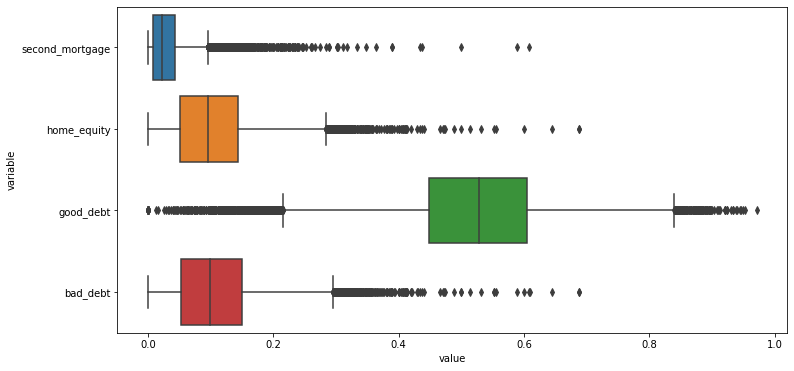

In [33]:
# d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities
import matplotlib.pyplot as plt
import seaborn as sns

data = real_df[['second_mortgage','home_equity','good_debt','bad_debt']]
plt.figure(figsize=(12,6))
sns.boxplot(y='variable',x='value',data=pd.melt(data))
plt.show()

# Observations:
# Second Mortgage has a smaller range and is silghtly right skewed with outliers towards right
# Home Equity and Bad debt has moderate range and is normally distributed with outliers towards right
# Good Debt has wide range of values and is normally distributed with outliers on both ends

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



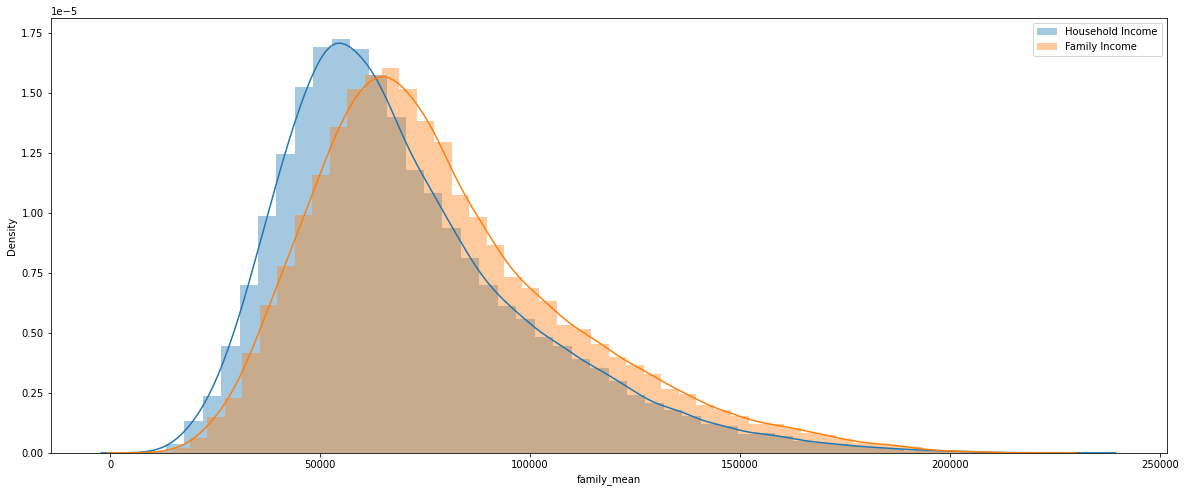

In [34]:
# Create a collated income distribution chart for family income, house hold income, and remaining income
plt.figure(figsize=(20,8))
sns.distplot(real_df.hi_mean,label='Household Income')
sns.distplot(real_df.family_mean,label='Family Income')
plt.legend()
plt.show()

In [35]:
'''
Exploratory Data Analysis (EDA):

1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

a) Use pop and ALand variables to create a new field called population density

b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

a) Analyze the married, separated, and divorced population for these population brackets

b) Visualize using appropriate chart type

3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.
'''

'\nExploratory Data Analysis (EDA):\n\n1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):\n\na) Use pop and ALand variables to create a new field called population density\n\nb) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type\n\n2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.\n\na) Analyze the married, separated, and divorced population for these population brackets\n\nb) Visualize using appropriate chart type\n\n3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.\n\n4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.\n'

In [36]:
# a) Use pop and ALand variables to create a new field called population density
real_df['pop_den'] = real_df['pop']/real_df['ALand']
real_df

COUNTYID  STATEID          state  ... bad_debt good_debt   pop_den
267822        53       36       New York  ...  0.09408   0.43555  0.000026
246444       141       18        Indiana  ...  0.04274   0.56581  0.001687
245683        63       18        Indiana  ...  0.09512   0.63972  0.000099
279653       127       72    Puerto Rico  ...  0.01086   0.51628  0.002442
247218       161       20         Kansas  ...  0.05426   0.46512  0.002207
...          ...      ...            ...  ...      ...       ...       ...
11704        105       12        Florida  ...  0.05620   0.37973  0.000061
11705         31       17       Illinois  ...  0.08182   0.55000  0.008241
11706          9       25  Massachusetts  ...  0.13545   0.60728  0.001415
11707         27       19           Iowa  ...  0.07967   0.57579  0.000537
11708        453       48          Texas  ...  0.05042   0.58824  0.002069

[37940 rows x 79 columns]

In [37]:
# b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age
real_df['median_age'] = (real_df['male_age_median']*real_df['male_pop'] + real_df['female_age_median']*real_df['female_pop'])/(real_df['male_pop']+real_df['female_pop'])
real_df

COUNTYID  STATEID          state  ... good_debt   pop_den median_age
267822        53       36       New York  ...   0.43555  0.000026  44.667430
246444       141       18        Indiana  ...   0.56581  0.001687  34.722748
245683        63       18        Indiana  ...   0.63972  0.000099  41.774472
279653       127       72    Puerto Rico  ...   0.51628  0.002442  49.879012
247218       161       20         Kansas  ...   0.46512  0.002207  21.965629
...          ...      ...            ...  ...       ...       ...        ...
11704        105       12        Florida  ...   0.37973  0.000061  57.620624
11705         31       17       Illinois  ...   0.55000  0.008241  31.159118
11706          9       25  Massachusetts  ...   0.60728  0.001415  39.323630
11707         27       19           Iowa  ...   0.57579  0.000537  44.528597
11708        453       48          Texas  ...   0.58824  0.002069  35.207171

[37940 rows x 80 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



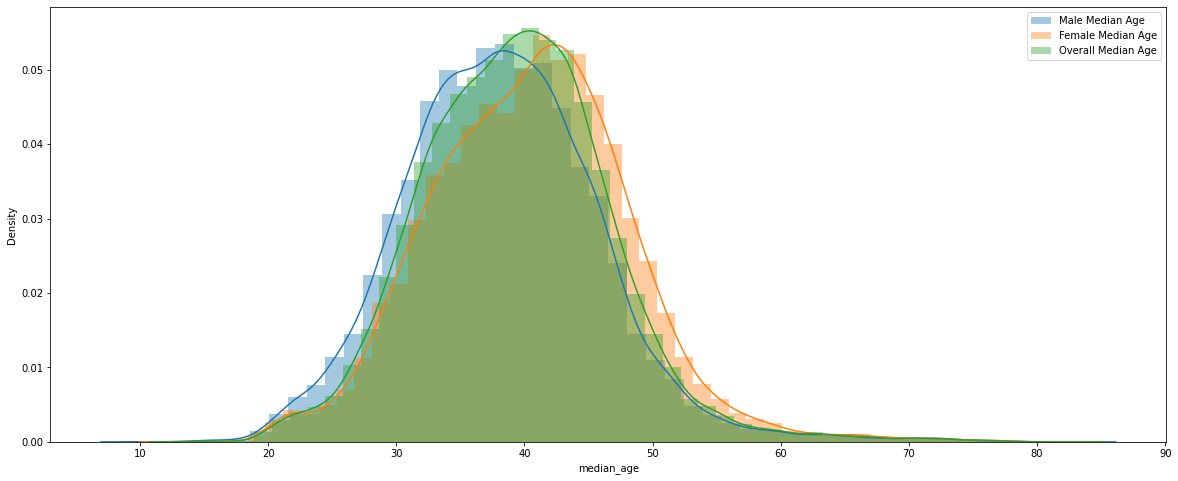

In [38]:
# c) Visualize the findings using appropriate chart type
plt.figure(figsize=(20,8))
sns.distplot(real_df.male_age_median,label='Male Median Age')
sns.distplot(real_df.female_age_median,label='Female Median Age')
sns.distplot(real_df.median_age,label='Overall Median Age')
plt.legend()
plt.show()

# Observations:
# Female median age (>40 years) is greater than male median age (<40 years) on an average

In [39]:
# Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.
import numpy as np
real_df['pop_bins'] = pd.cut(real_df['pop'],bins=np.linspace(0,54000,6),labels=["0-10800","10800-21600","21600-32400","32400-43200","43200-54000"])
real_df[['pop','pop_bins']]

pop pop_bins
267822  5230  0-10800
246444  2633  0-10800
245683  6881  0-10800
279653  2700  0-10800
247218  5637  0-10800
...      ...      ...
11704   5611  0-10800
11705   2695  0-10800
11706   7392  0-10800
11707   5945  0-10800
11708   4117  0-10800

[37940 rows x 2 columns]

In [40]:
# Checking the count of population for the bins created
real_df['pop_bins'].value_counts()

0-10800        37585
10800-21600      339
21600-32400       12
32400-43200        3
43200-54000        1
Name: pop_bins, dtype: int64

In [41]:
# a) Analyze the married, separated, and divorced population for these population brackets
marital_df = real_df[['pop','married','separated','divorced','pop_bins']]
marital_df['married_num'] = marital_df['pop'] * marital_df['married']
marital_df['separated_num'] = marital_df['pop'] * marital_df['separated']
marital_df['divorced_num'] = marital_df['pop'] * marital_df['divorced']
marital_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

pop  married  separated  ...  married_num separated_num  divorced_num
267822  5230  0.57851    0.01240  ...   3025.60730      64.85200     458.67100
246444  2633  0.34886    0.01426  ...    918.54838      37.54658     237.75990
245683  6881  0.64745    0.01607  ...   4455.10345     110.57767     733.30817
279653  2700  0.47257    0.02021  ...   1275.93900      54.56700     272.86200
247218  5637  0.12356    0.00000  ...    696.50772       0.00000     175.25433
...      ...      ...        ...  ...          ...           ...           ...
11704   5611  0.65969    0.02135  ...   3701.52059     119.79485     492.64580
11705   2695  0.42882    0.02829  ...   1155.66990      76.24155     142.96975
11706   7392  0.50269    0.00108  ...   3715.88448       7.98336     539.17248
11707   5945  0.66699    0.00000  ...   3965.25555       0.00000     279.05830
11708   4117  0.51922    0.02520  ...   2137.62874     103.74840     435.82562

[37940 rows x 8 columns]

In [42]:
group = marital_df.groupby('pop_bins')
group = pd.DataFrame(group['married_num','separated_num','divorced_num'].agg(np.sum))
print(group)

print("\nTotal Population:",np.sum(marital_df['pop']))
print("Total Married:",np.sum(marital_df.married_num))
print("Total Separated:",np.sum(marital_df.separated_num))
print("Total divorced:",np.sum(marital_df.divorced_num))
# Observations:
# Out of ~166Mn population, ~87Mn are married, ~16Mn are divorced and ~3Mn are separated
# Majority of the population is falling in first (0-10800) and second (10800-21600) bins
# ~84Mn are married, ~15.7Mn divorced and ~3Mn separated people fall in locations having <10800 population

              married_num  separated_num  divorced_num
pop_bins                                              
0-10800      8.397593e+07   2.966350e+06  1.571751e+07
10800-21600  2.675873e+06   6.521666e+04  3.349785e+05
21600-32400  1.771719e+05   3.424042e+03  2.112078e+04
32400-43200  7.829652e+04   1.666850e+03  8.300232e+03
43200-54000  3.953783e+04   2.179386e+02  1.633732e+03

Total Population: 166403989
Total Married: 86946807.97670999
Total Separated: 3036875.1934
Total divorced: 16083544.64636


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [43]:
# b) Visualize using appropriate chart type
plt.figure(figsize=(12,8))
fig = px.bar(group, x=group.index, y=["married_num", "separated_num", "divorced_num"])
fig.show()

<Figure size 864x576 with 0 Axes>

In [44]:
# Calculating average rent as percentage of average household income
real_df['rent_pct'] = real_df['rent_mean']/real_df['hi_mean']
real_df

COUNTYID  STATEID          state  ... median_age pop_bins  rent_pct
267822        53       36       New York  ...  44.667430  0-10800  0.012188
246444       141       18        Indiana  ...  34.722748  0-10800  0.019195
245683        63       18        Indiana  ...  41.774472  0-10800  0.008744
279653       127       72    Puerto Rico  ...  49.879012  0-10800  0.016486
247218       161       20         Kansas  ...  21.965629  0-10800  0.029483
...          ...      ...            ...  ...        ...      ...       ...
11704        105       12        Florida  ...  57.620624  0-10800  0.025273
11705         31       17       Illinois  ...  31.159118  0-10800  0.019873
11706          9       25  Massachusetts  ...  39.323630  0-10800  0.011945
11707         27       19           Iowa  ...  44.528597  0-10800  0.012042
11708        453       48          Texas  ...  35.207171  0-10800  0.016379

[37940 rows x 82 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



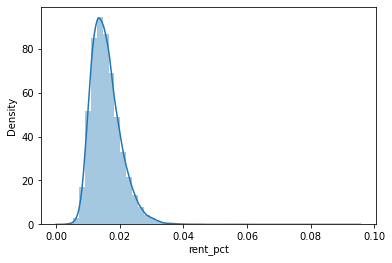

In [45]:
# 3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.
sns.distplot(real_df['rent_pct'])
# Observations:
# Overall, Average rent is approximately slightly less than 2% of average household income

In [46]:
# Grouping rent and household income by states
rent = real_df[['state','state_ab','rent_mean','hi_mean']]
rent = rent.groupby('state_ab')
rent_df = pd.DataFrame(rent['rent_mean','hi_mean'].agg(np.sum))
rent_df['rent_pct'] = rent_df['rent_mean']/rent_df['hi_mean']
print(rent_df)

             rent_mean       hi_mean  rent_pct
state_ab                                      
AK        1.208197e+05  8.637785e+06  0.013987
AL        4.630363e+05  3.386336e+07  0.013674
AR        2.541412e+05  1.939590e+07  0.013103
AZ        8.402896e+05  5.147532e+07  0.016324
CA        5.962284e+06  3.348984e+08  0.017803
CO        7.692085e+05  5.096446e+07  0.015093
CT        5.738708e+05  4.078962e+07  0.014069
DC        1.350433e+05  8.539456e+06  0.015814
DE        1.191767e+05  8.039070e+06  0.014825
FL        2.562324e+06  1.433095e+08  0.017880
GA        9.957610e+05  6.766986e+07  0.014715
HI        2.493010e+05  1.339747e+07  0.018608
IA        3.049067e+05  2.638637e+07  0.011555
ID        1.194074e+05  8.883005e+06  0.013442
IL        1.614683e+06  1.143652e+08  0.014119
IN        6.405490e+05  4.744462e+07  0.013501
KS        3.523778e+05  2.772092e+07  0.012712
KY        4.069758e+05  3.175204e+07  0.012817
LA        4.960024e+05  3.520436e+07  0.014089
MA        9.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [47]:
#Visualizing rent by states
fig = px.choropleth(rent_df, locations=rent_df.index,
                    locationmode="USA-states",
                    color="rent_pct",
                    scope='usa',
                    color_continuous_scale="Viridis")
fig.show()

# Observations;
# Hawai, California and Florida are the top 3 states with highest rent as a percentage of household income

In [48]:
# 4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.
rel_var = real_df[['ALand','AWater','pop','male_pop','female_pop','rent_mean','hi_mean','family_mean','hc_mortgage_mean','hc_mean','home_equity','second_mortgage',
         'home_equity_second_mortgage','debt','bad_debt','hs_degree','hs_degree_male','hs_degree_female','male_age_mean','female_age_mean','pct_own','married',
         'married_snp','separated','divorced']]
rel_var

ALand   AWater   pop  ...  married_snp  separated  divorced
267822  202183361.0  1699120  5230  ...      0.01882    0.01240   0.08770
246444    1560828.0   100363  2633  ...      0.01426    0.01426   0.09030
245683   69561595.0   284193  6881  ...      0.02830    0.01607   0.10657
279653    1105793.0        0  2700  ...      0.02021    0.02021   0.10106
247218    2554403.0        0  5637  ...      0.00000    0.00000   0.03109
...             ...      ...   ...  ...          ...        ...       ...
11704    92582775.0  1166617  5611  ...      0.02135    0.02135   0.08780
11705      327029.0        0  2695  ...      0.07781    0.02829   0.05305
11706     5225804.0   393810  7392  ...      0.00108    0.00108   0.07294
11707    11066759.0        0  5945  ...      0.02738    0.00000   0.04694
11708     1990126.0        0  4117  ...      0.08066    0.02520   0.10586

[37940 rows x 25 columns]

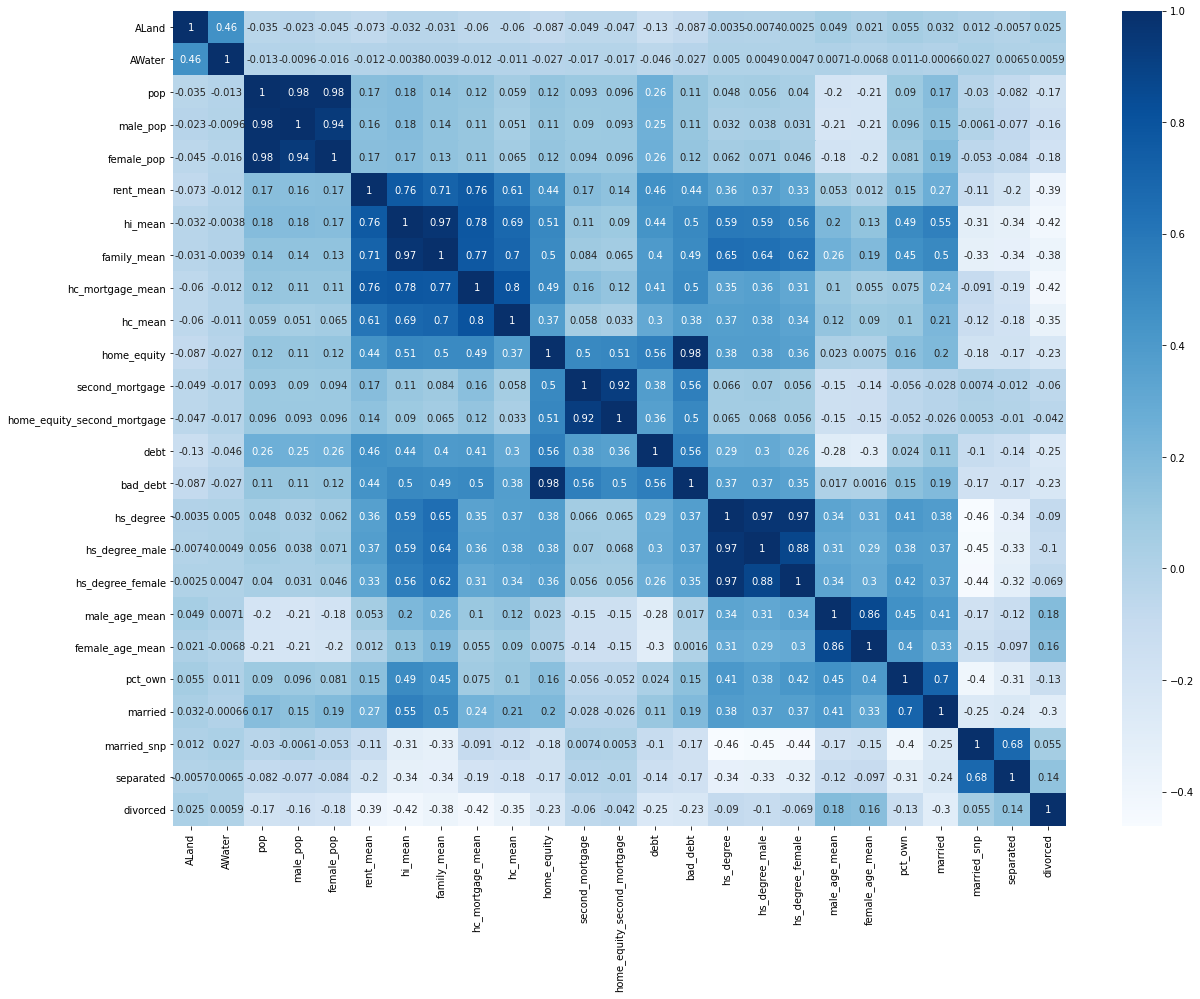

In [49]:
#Correlation heat map
plt.figure(figsize=(20,15))
sns.heatmap(rel_var.corr(),cmap='Blues',annot=True)
plt.show()

# Observations:
# Household and family Income is highly correlated with high school degree, percent of owned houses, marriage, average rent, monthly mortgage and owner costs,
# debt and bad debt
# Home equity loan is highly correlated with bad debt
# Home equity and second mortgage is highly correlated with second mortgage
# Bad debt is more likely due to home equity loans and second mortgage
# Age is directly influencing marriage, divorce and percent of home ownership
# Higher houselhold and family income => less divorces and separations 

In [50]:
# Dropping unnecessary variables
real_df.drop(['pop_bins'],axis=1,inplace=True)

In [51]:
# Finding categorical columns
cat_col = real_df.select_dtypes(include="object").columns
cat_col

Index(['state', 'state_ab', 'city', 'place', 'type'], dtype='object')

In [52]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_col:
  real_df[col] = le.fit_transform(real_df[col].astype(str))

real_df

COUNTYID  STATEID  state  ...   pop_den  median_age  rent_pct
267822        53       36     32  ...  0.000026   44.667430  0.012188
246444       141       18     14  ...  0.001687   34.722748  0.019195
245683        63       18     14  ...  0.000099   41.774472  0.008744
279653       127       72     39  ...  0.002442   49.879012  0.016486
247218       161       20     16  ...  0.002207   21.965629  0.029483
...          ...      ...    ...  ...       ...         ...       ...
11704        105       12      9  ...  0.000061   57.620624  0.025273
11705         31       17     13  ...  0.008241   31.159118  0.019873
11706          9       25     21  ...  0.001415   39.323630  0.011945
11707         27       19     15  ...  0.000537   44.528597  0.012042
11708        453       48     44  ...  0.002069   35.207171  0.016379

[37940 rows x 81 columns]

In [53]:
# Splitting into train and test sets
real_train_df1 = real_df.iloc[0:26585,:]
real_test_df1 = real_df.iloc[26585:,:]
print(real_train_df1.shape)
print(real_test_df1.shape)

(26585, 81)
(11355, 81)


In [54]:
'''
Data Pre-processing:

1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a 
number of smaller unobserved common factors or latent variables. 
2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. 
Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable.
Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships
in the data. 

Following are the list of latent variables:

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense
'''

'\nData Pre-processing:\n\n1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a \nnumber of smaller unobserved common factors or latent variables. \n2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. \nEach measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable.\nObtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships\nin the data. \n\nFollowing are the list of latent variables:\n\n• Highschool graduation rates\n\n• Median population age\n\n• Second mortgage statistics\n\n• Percent own\n\n• Bad debt expense\n'

In [55]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 2.9MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=2bb1692aec3786688d7440005c1a13ef3faa8abf11f2618662b80f7fcf1fde7c
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [56]:
# Bartlett’s Test --checks whether the correlation is present in the given data
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi2,p = calculate_bartlett_sphericity(real_df)
print("Chi squared value : ",chi2)
print("p value : ",p)

# Observations:
# Since p-value < 0.05 => correlation is present among the variables in the dataset

Chi squared value :  14756749.804656398
p value :  0.0


In [57]:
# KMO test --Measures the proportion of common variance among the variables
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_vars,kmo_model = calculate_kmo(real_df)
print(kmo_model)

0.43850202507859165


/usr/local/lib/python3.6/dist-packages/factor_analyzer/utils.py:248: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



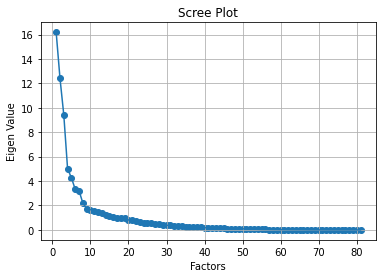

In [58]:
# Factor Analysis
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(real_df,10)

#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.scatter(range(1,real_df.shape[1]+1),ev)
plt.plot(range(1,real_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

# Observations:
# Eigen Values are dropping below 3 after 7th factore an ddropping below 2 after 8th factor
# Optimal number of factors = 7 or 8

In [59]:
# Interpreting the Factors by plotting loadings
fa = FactorAnalyzer(n_factors=7,rotation='varimax')
fa.fit(real_df)

# Settings to see all rows and columns
pd.set_option('display.max_columns', None,'display.max_rows',None)
print(pd.DataFrame(fa.loadings_,index=real_df.columns))

# Observations:
# Factor1 - Higher loadings on income, degree, rent, mortgage costs and debt
# Factor2 - Higher loadings on population and number of samples used
# Factor3 - Higher loadings on age related variables
# Factor4 - Higher loadings on rent as percent of household income
# Factor5 - Higher loadings on mortgage, home equity loan and bad debt
# Factor6 - Higher loadings on number of smples used for rent, universe samples, pct_own and married
# Factor7 - Higher loadings on state and city (location)

                                    0         1         2         3         4  \
COUNTYID                    -0.097256  0.025290 -0.062471 -0.029951 -0.095203   
STATEID                     -0.091589  0.012910 -0.020031 -0.074374 -0.087601   
state                       -0.065399  0.013697 -0.032208 -0.092287 -0.065336   
state_ab                    -0.054328  0.009350 -0.034863 -0.086600 -0.074816   
city                         0.000412  0.015274  0.029055  0.005352  0.028644   
place                        0.025166  0.004227  0.001258  0.008086  0.008176   
type                        -0.087404  0.034828 -0.052067 -0.041208 -0.010199   
zip_code                    -0.064484  0.061158 -0.173057 -0.084296 -0.019140   
area_code                    0.034358  0.028656 -0.036099  0.036619 -0.033603   
lat                          0.116377 -0.104782 -0.002249 -0.138891  0.256577   
lng                         -0.018869 -0.049593  0.165753  0.048882 -0.014724   
ALand                       

In [60]:
# Variance captured by each factor
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4  \
Variance          12.949905  11.918745  6.889901  6.266754  5.376850   
Proportional Var   0.159875   0.147145  0.085061  0.077367  0.066381   
Cumulative Var     0.159875   0.307020  0.392081  0.469448  0.535829   

                         5         6  
Variance          5.333653  3.409919  
Proportional Var  0.065848  0.042098  
Cumulative Var    0.601677  0.643774  


In [61]:
# Communality - Proportion of each variable's variance explained by each factor
print(pd.DataFrame(fa.get_communalities(),index=real_df.columns,columns=['Communalities']))

                             Communalities
COUNTYID                          0.062154
STATEID                           0.872989
state                             0.879970
state_ab                          0.869175
city                              0.004555
place                             0.001624
type                              0.026250
zip_code                          0.214368
area_code                         0.008547
lat                               0.148296
lng                               0.248962
ALand                             0.030753
AWater                            0.006964
pop                               0.985176
male_pop                          0.935528
female_pop                        0.965196
rent_mean                         0.759268
rent_median                       0.686887
rent_stdev                        0.477813
rent_sample_weight                0.759403
rent_samples                      0.963845
rent_gt_10                        0.196571
rent_gt_15 

In [62]:
# Resetting display options
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
real_df

COUNTYID  STATEID  state  ...   pop_den  median_age  rent_pct
267822        53       36     32  ...  0.000026   44.667430  0.012188
246444       141       18     14  ...  0.001687   34.722748  0.019195
245683        63       18     14  ...  0.000099   41.774472  0.008744
279653       127       72     39  ...  0.002442   49.879012  0.016486
247218       161       20     16  ...  0.002207   21.965629  0.029483
...          ...      ...    ...  ...       ...         ...       ...
11704        105       12      9  ...  0.000061   57.620624  0.025273
11705         31       17     13  ...  0.008241   31.159118  0.019873
11706          9       25     21  ...  0.001415   39.323630  0.011945
11707         27       19     15  ...  0.000537   44.528597  0.012042
11708        453       48     44  ...  0.002069   35.207171  0.016379

[37940 rows x 81 columns]

In [ ]:
'''
Data Modeling :

1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. 
Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location. 

Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

b) Run another model at State level. There are 52 states in USA.

c) Keep below considerations while building a linear regression model. Data Modeling :

• Variables should have significant impact on predicting Monthly mortgage and owner costs

• Utilize all predictor variable to start with initial hypothesis

• R square of 60 percent and above should be achieved

• Ensure Multi-collinearity does not exist in dependent variables

• Test if predicted variable is normally distributed
'''

In [66]:
# Splitting the dataset into x and y variables
x_train = real_train_df1.drop(['state','state_ab','hc_mortgage_median','hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples'],axis=1)
y_train = real_train_df1['hc_mortgage_mean']

print(x_train.shape)
print(y_train.shape)

(26585, 75)
(26585,)


In [67]:
# Splitting the dataset into x and y variables
x_test = real_test_df1.drop(['state','state_ab','hc_mortgage_median','hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples'],axis=1)
y_test = real_test_df1['hc_mortgage_mean']

print(x_test.shape)
print(y_test.shape)

(11355, 75)
(11355,)


In [68]:
# Feature Scaling --Standardizing our dataset
from sklearn.preprocessing import StandardScaler

# Initialization
sc = StandardScaler()

# Fitting and transforming on train data
x_train_std = sc.fit_transform(x_train)

# Transforming test data
x_test_std = sc.transform(x_test)

In [70]:
# Model Building
# Regression Model 1 ---Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Initialization
lr = LinearRegression()

# Fitting the model on train set
real_lin_reg = lr.fit(x_train_std,y_train)

# Predictions on test set
y_pred = real_lin_reg.predict(x_test_std)

In [72]:
# Model Evaluation
from sklearn import metrics

print("Accuracy: ",metrics.r2_score(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy:  1.0
MSE:  4.122039319011154e-24
RMSE:  2.0302806010527594e-12


In [75]:
# Creating variables to capture evaluation metrics
r2s = []
mse = []
rmse = []

In [76]:
# Appending results into the list
r2s.append(metrics.r2_score(y_test,y_pred))
mse.append(metrics.mean_squared_error(y_test,y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [77]:
# Model Building
# Regression Model 2 ---Ridge Regression
from sklearn.linear_model import Ridge

# Initialization
rdg = Ridge()

# Fitting the model on train set
real_rdg_reg = rdg.fit(x_train_std,y_train)

# Predictions on test set
y_pred = real_rdg_reg.predict(x_test_std)

In [78]:
# Model Evaluation
from sklearn import metrics

print("Accuracy: ",metrics.r2_score(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy:  0.9999999888232182
MSE:  0.004453686657958066
RMSE:  0.06673594726950435


In [79]:
# Appending results into the list
r2s.append(metrics.r2_score(y_test,y_pred))
mse.append(metrics.mean_squared_error(y_test,y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [80]:
# Model Building
# Regression Model 3 ---Lasso Regression
from sklearn.linear_model import Lasso

# Initialization
lso = Lasso()

# Fitting the model on train set
real_lso_reg = lso.fit(x_train_std,y_train)

# Predictions on test set
y_pred = real_lso_reg.predict(x_test_std)

In [81]:
# Model Evaluation
from sklearn import metrics

print("Accuracy: ",metrics.r2_score(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy:  0.9999974029216658
MSE:  1.0348750933186261
RMSE:  1.017288107331756


In [82]:
# Appending results into the list
r2s.append(metrics.r2_score(y_test,y_pred))
mse.append(metrics.mean_squared_error(y_test,y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [83]:
# Model Building
# Regression Model 4 ---Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Initialization
en = ElasticNet()

# Fitting the model on train set
real_en_reg = en.fit(x_train_std,y_train)

# Predictions on test set
y_pred = real_en_reg.predict(x_test_std)

In [84]:
# Model Evaluation
from sklearn import metrics

print("Accuracy: ",metrics.r2_score(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy:  0.9243020218845118
MSE:  30163.87728257817
RMSE:  173.677509432218


In [85]:
# Appending results into the list
r2s.append(metrics.r2_score(y_test,y_pred))
mse.append(metrics.mean_squared_error(y_test,y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [86]:
# Model Building
# Regression Model 5 ---Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Initialization
dtr = DecisionTreeRegressor()

# Fitting the model on train set
real_dtr_reg = dtr.fit(x_train_std,y_train)

# Predictions on test set
y_pred = real_dtr_reg.predict(x_test_std)

In [87]:
# Model Evaluation
from sklearn import metrics

print("Accuracy: ",metrics.r2_score(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy:  0.9999922138362765
MSE:  3.102604493601558
RMSE:  1.7614211573617362


In [88]:
# Appending results into the list
r2s.append(metrics.r2_score(y_test,y_pred))
mse.append(metrics.mean_squared_error(y_test,y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [89]:
# Model Building
# Regression Model 6 ---Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialization
rfr = RandomForestRegressor()

# Fitting the model on train set
real_rfr_reg = rfr.fit(x_train_std,y_train)

# Predictions on test set
y_pred = real_rfr_reg.predict(x_test_std)

In [90]:
# Model Evaluation
from sklearn import metrics

print("Accuracy: ",metrics.r2_score(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy:  0.9999917656506561
MSE:  3.281196001479286
RMSE:  1.8114071882045975


In [91]:
# Appending results into the list
r2s.append(metrics.r2_score(y_test,y_pred))
mse.append(metrics.mean_squared_error(y_test,y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [92]:
# Model Building
# Regression Model 7 ---Support Vector Regression
from sklearn.svm import SVR

# Initialization
svr = SVR()

# Fitting the model on train set
real_svr_reg = svr.fit(x_train_std,y_train)

# Predictions on test set
y_pred = real_svr_reg.predict(x_test_std)

In [93]:
# Model Evaluation
from sklearn import metrics

print("Accuracy: ",metrics.r2_score(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy:  0.6889994642255626
MSE:  123926.4539087708
RMSE:  352.031893311914


In [94]:
# Appending results into the list
r2s.append(metrics.r2_score(y_test,y_pred))
mse.append(metrics.mean_squared_error(y_test,y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [96]:
# Summary Table
reg_models = ['Linear Regression','Ridge regression','Lasso Regression','Elastic Net Regression','Decision Tree Regression','Random Forest Regression',
              'Support Vector Regression']
results_df = pd.DataFrame({'Regression Model':reg_models,'R2_Score':r2s,'Mean Squared Error':mse,'Root Mean Squared Error':rmse})
results_df

# Observations:
# All the models have an r2_score > 60%
# Linear Regression model gives the best possible accuracy with low error values => Best Model

Regression Model  ...  Root Mean Squared Error
0          Linear Regression  ...             2.030281e-12
1           Ridge regression  ...             6.673595e-02
2           Lasso Regression  ...             1.017288e+00
3     Elastic Net Regression  ...             1.736775e+02
4   Decision Tree Regression  ...             1.761421e+00
5   Random Forest Regression  ...             1.811407e+00
6  Support Vector Regression  ...             3.520319e+02

[7 rows x 4 columns]